# Interpolación trigonometrica

## Caso discreto

Iniciaremos nuestro estudio con el método de aproximación trigonométrica de mínimos cuadrados discretos.

Para simplificar el proceso usaremos el intervalo: $[-π,π]$

El objetivo en este caso consiste en determinar el polinomio trigonométrico:

$$ S_{n}(x) =$$

Donde:

$ a_{k} = \frac{1}{m} \sum_{j=0}^{2m-1} y_{j}cos(kx_{j})$ para $k = 0,1,2,3,...,n$

y 

$ b_{k} =\frac{1}{m} \sum_{j=0}^{2m-1} y_{j}sen(kx_{j})$ para $k = 1,2,3,...,n-1$

### Ejemplo

Sea $ F(x) = sin( \frac{1}{2}x) + cos( \frac{1}{3}x) $ , para obtener la aproximación de mínimos cuadrados discretos $ S_{3}(x) $ donde $ 2m-1 = 11 $ en el intervalo de $[-π,π]$.


In [141]:
 # Usaremos SymPy como herramienta para realizar manipulaciones simbólicas
from sympy import *

# Las siguientes dos librerías serán utilizadas para graficar
import numpy as np
import matplotlib.pyplot as plt;

# Usaremos lo siguiente para mostrar los polinomios
from sympy.interactive import printing;
printing.init_printing(use_latex=True);
from IPython.display import display, Latex

Definimos la funcion que queremos interpolar:

In [142]:
def f(x):
    return sin((1/2)*x) + 2*cos((1/3)*x)

Definimos una funcion para calcular $x_{j} = π(\frac{j}{m} -1)$ 

In [143]:
def xj(j):
    return pi*((j/m)-1)

Definimos una funcion para calcular $y_{j} = F(xj)$ 

In [144]:
def yj(j):
    return f(xjArray[j])

El polinomio trigonomético de mínimos cuadrados es:

$$ S_{3}(x) = \frac{a_{0}}{2} + a_{3}cos(3x) + \sum_{k=1}^{2}a_{k}cos(kx) + b_{k}sen(kx)$$


In [145]:
x = Symbol('x')

def PolinomioResultante(ak,bk):
    
    coef = np.append(ak,bk)
    
    s = coef[0] / 2
    
    for k in range (1, n + 1):
        s += coef[k] * cos(k * x)
        if(k + n < m):
            s += coef[k + n] * sin(k * x)
    return s

Declaramos el grado del polinomio y el numero de puntos a utilizar

In [146]:
#Declaramos el grado del polinomio
n = 3
#Declaramos el numero de puntos a utilizar
m = 6

Ahora procedemos a calcular la aproximacion 

In [147]:
#Declaraciones de arreglos donde guardaremos los xj y yj
xjArray = []
yjArray = []

#Declaraciones de arreglos donde guardaremos los ak y bk resultantes
ak = []
bk = []

for j in range(0, (2*m)):
    xjArray.append(xj(j))
    yjArray.append(yj(j))

Donde $a_{k} = \frac{1}{6} \sum_{j=0}^{11} y_{j}cos(kx_{j})$ para $k = 0,1,2,3$

In [148]:
for k in range(0, (n+1)):
    aux = 0
    for h in range(0, (2*m)):
        aux += yjArray[h]*cos(k*xjArray[h])
    aux *= (1/m)

    ak.append(aux)

y $ b_{k} =\frac{1}{6} \sum_{j=0}^{11} y_{j}sen(kx_{j})$ para $k = 1,2 $

In [149]:
for k in range(1, n):
    aux = 0
    for h in range(0, (2*m)):
        aux += yjArray[h]*sin(k*xjArray[h])
    aux *= (1/m)

    bk.append(aux)

Sustituyendo para las $a_{k}$ tendremos:

In [150]:
for i in range(0, len(ak)):
    print("a"+str(i) + ": \t " + str(ak[i].evalf()) + "\n")

a0: 	 3.13290522025871

a1: 	 0.588681481039659

a2: 	 -0.270064169591672

a3: 	 0.217567881555380



Sustituyendo para las $b_{k}$ tendremos:

In [151]:
for i in range(0, len(bk)):
    print("b"+str(i+1) + ": \t " + str(bk[i].evalf()) + "\n")

b1: 	 0.834163972924854

b2: 	 -0.309786577934525



Así el polinomio resultante es:

In [152]:
pol = PolinomioResultante(ak, bk)
display(Latex('$$ S_{3}(x) = '+ latex(simplify(pol.evalf())) + '$$'))

<IPython.core.display.Latex object>

Ahora graficamos, usando las herramientas que ofrecen la librerías $\texttt{matplotlib}$ y $\texttt{numpy}$:

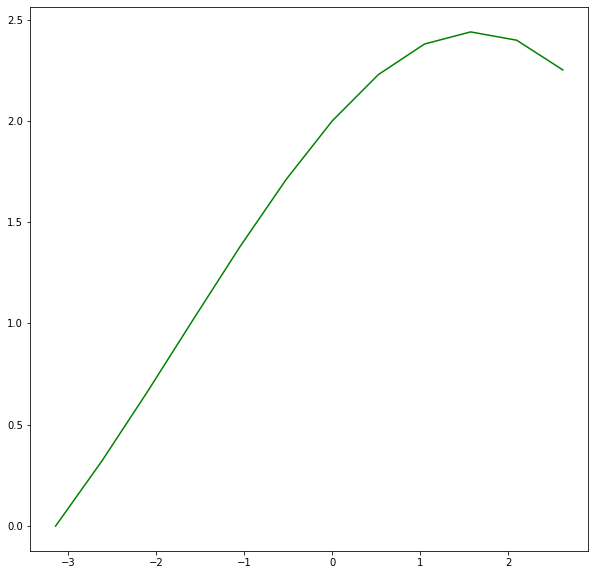

In [158]:
#Declaracion de arreglo donde guardaremos los puntos de la funcion real para comparar el resultado.
yReal = []

coef = np.append(ak,bk)

xE = np.array(xjArray)
yE = np.array(yjArray)

xv = np.linspace(-np.pi, np.pi, 100);

for x in xv:
    yReal.append(f(x))
    
fig, ax = plt.subplots(figsize=(10, 10));


yReal = np.array(yReal)
ax.plot(xE, yE, color='green')
#ax.plot(xv, yReal, color='red')
plt.show(); 
